## 1. Import needed libraries

In [4]:
# configuring local imports
import sys
# Change this to be the path to the 'helpers' folder
sys.path.insert(1, '/home/maycon/Documents/LAB/lab_data_analysis/helpers')

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import masked_seqs_stats
from Bio import SeqIO
%matplotlib inline

## 2. Load the vector-masked EST sequences and calculate stats

In [10]:
# Change this to be the path to the .screen files
path_to_seqs = '/home/maycon/Documents/LAB/eusociality/local_data/crossmatch_filtered'

xgroups_data = pd.DataFrame(columns=["seq_id", "taxon", "seq_len", "seq_xgroup_count", "xgroup_len", "dist_from_3", "dist_from_5", "seq_class"])

for seq_file in os.listdir(path_to_seqs):
    if seq_file.endswith('.screen'):
        taxon_name = seq_file.split('.')[0].split('_ests')[0]
        file_path = os.path.join(path_to_seqs, seq_file)
    
        for seq in SeqIO.parse(file_path, 'fasta'):
            if 'X' in seq.seq:
                current_seqlist = masked_seqs_stats.find_x_regions_and_calculate_stats(seq, taxon_name)

                if len(current_seqlist) > 0:
                    for seq_dict in current_seqlist:
                        xgroups_data = xgroups_data.append(seq_dict, ignore_index=True)
        
        nums_list = ['seq_len', 'seq_xgroup_count', 'xgroup_len', 'dist_from_3', 'dist_from_5']
        
        for col in nums_list:
            xgroups_data[col] = pd.to_numeric(xgroups_data[col], downcast='integer', errors='coerce')

In [13]:
xgroups_data

,seq_id,taxon,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5,seq_class
0,DT319107.1,Polistes_canadensis,236,1,56,176,4,3
1,DT319140.1,Polistes_canadensis,395,1,44,351,0,3
2,DT319145.1,Polistes_canadensis,235,1,194,26,15,3
3,DB735471.1,Apis_mellifera,497,1,110,3,384,7
4,DB777386.1,Apis_mellifera,487,1,199,288,0,3
...,...,...,...,...,...,...,...,...
564,EE149448.1,Solenopsis_invicta,379,1,81,0,298,5
565,EE148907.1,Solenopsis_invicta,351,1,37,314,0,3
566,EE148927.1,Solenopsis_invicta,372,1,103,269,0,3
567,EE148957.1,Solenopsis_invicta,334,1,37,297,0,3


In [16]:
xgroups_data.shape

(569, 8)

In [19]:
xgroups_data.dtypes

seq_id              object
taxon               object
seq_len              int16
seq_xgroup_count      int8
xgroup_len           int16
dist_from_3          int16
dist_from_5          int16
seq_class           object
dtype: object

In [22]:
xgroups_data.describe()

,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,490.042179,1.091388,156.010545,238.323374,95.708260
std,193.207703,0.306180,195.487284,218.662944,166.647418
min,53.000000,1.000000,32.000000,0.000000,0.000000
25%,362.000000,1.000000,53.000000,12.000000,8.000000
50%,484.000000,1.000000,72.000000,251.000000,21.000000
75%,607.000000,1.000000,123.000000,383.000000,47.000000
max,1419.000000,3.000000,873.000000,1331.000000,882.000000


## 3. Plotting the stats

In [25]:
sns.set_theme()

### 3.1. By xgroup length per taxon

Text(0.5, 8.95999999999998, 'Xgroup length')

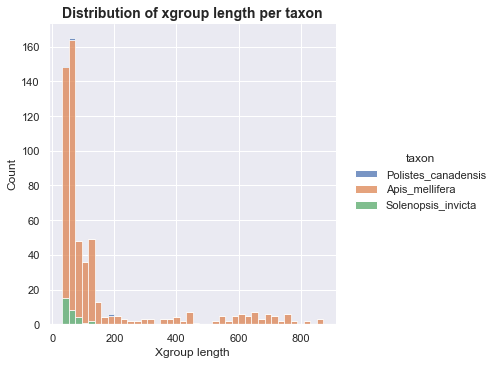

In [70]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack')
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

Text(0.5, 8.95999999999998, 'Xgroup length')

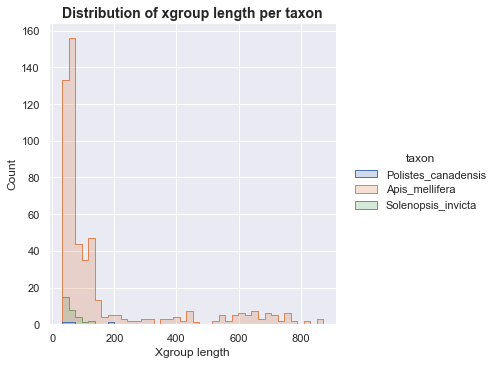

In [71]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', element='step')
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

#### Normalizing by density

Text(0.5, 8.95999999999998, 'Xgroup length')

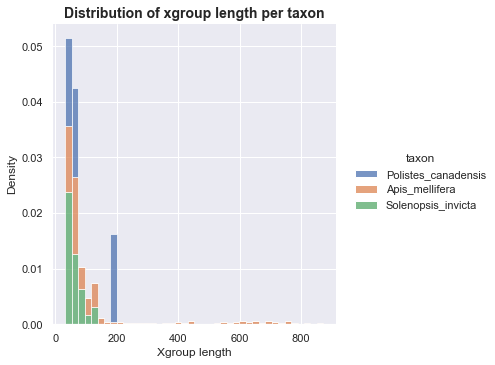

In [72]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack', stat='density', common_norm=False)
plt.title('Distribution of xgroup length per taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')

#### Scatterplots of xgroup length by seq length

Text(0, 0.5, 'Seq length')

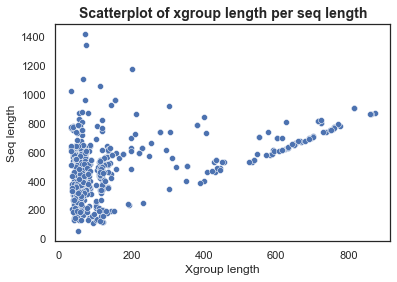

In [113]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='xgroup_len', y='seq_len')
plt.title('Scatterplot of xgroup length per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')
plt.ylabel('Seq length')

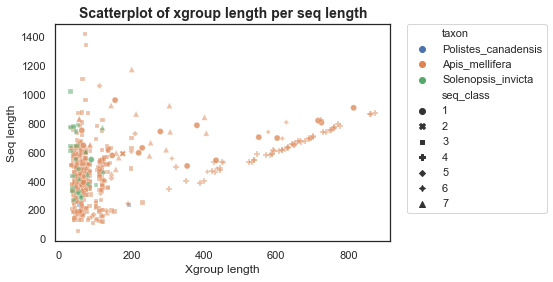

In [122]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='xgroup_len', y='seq_len', hue='taxon', style='seq_class', alpha=.5)
plt.title('Scatterplot of xgroup length per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup length')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 3.2. Xgroup distance from 5' and 3'

In [114]:
sns.set_theme()

#### From 5'

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

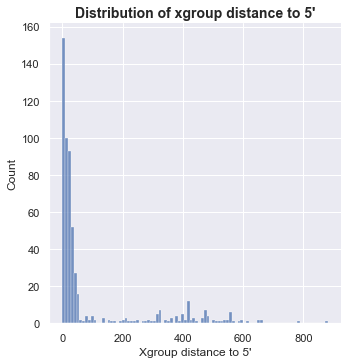

In [115]:
sns.displot(data=xgroups_data, x='dist_from_5')
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

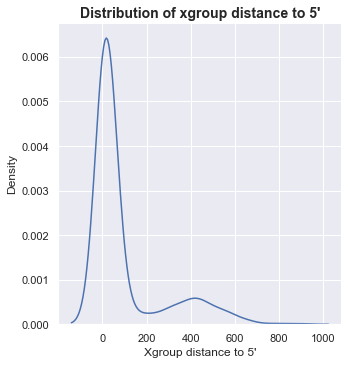

In [74]:
sns.displot(data=xgroups_data, x='dist_from_5', kind='kde')
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 5'")

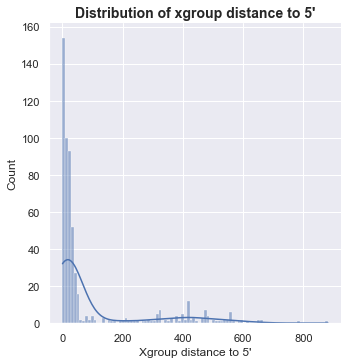

In [75]:
sns.displot(data=xgroups_data, x='dist_from_5', kde=True)
plt.title('Distribution of xgroup distance to 5\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')

Text(0, 0.5, 'Seq length')

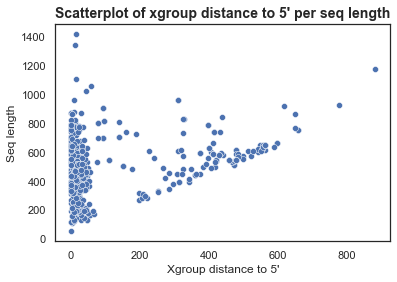

In [128]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='dist_from_5', y='seq_len')
plt.title('Scatterplot of xgroup distance to 5\' per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 5\'')
plt.ylabel('Seq length')

#### From 3'

In [130]:
sns.set_theme()

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

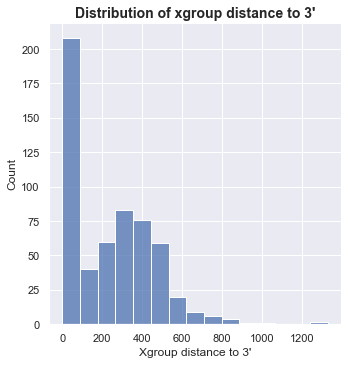

In [131]:
sns.displot(data=xgroups_data, x='dist_from_3')
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

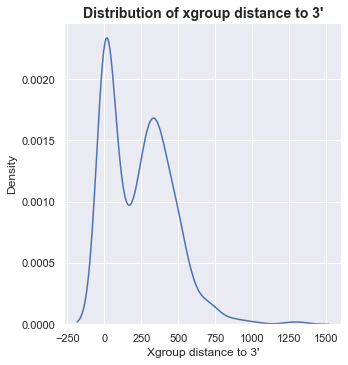

In [77]:
sns.displot(data=xgroups_data, x='dist_from_3', kind='kde')
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0.5, 8.95999999999998, "Xgroup distance to 3'")

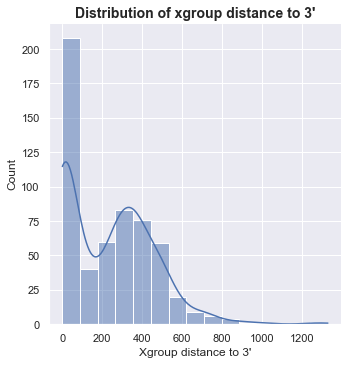

In [78]:
sns.displot(data=xgroups_data, x='dist_from_3', kde=True)
plt.title('Distribution of xgroup distance to 3\'', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')

Text(0, 0.5, 'Seq length')

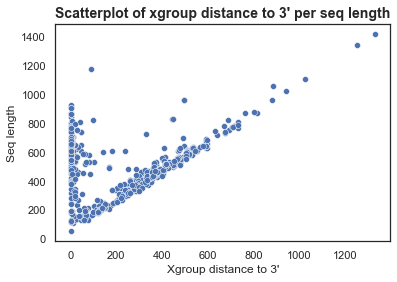

In [132]:
sns.set_theme(style="white")
sns.scatterplot(data=xgroups_data, x='dist_from_3', y='seq_len')
plt.title('Scatterplot of xgroup distance to 3\' per seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Xgroup distance to 3\'')
plt.ylabel('Seq length')

### 3.3. EST class

In [137]:
sns.set_theme()

Text(0.5, 8.95999999999998, 'EST sequence class')

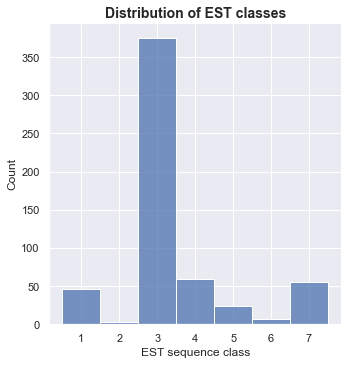

In [81]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True)
plt.title('Distribution of EST classes', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

#### By taxon

Text(0.5, 8.95999999999998, 'EST sequence class')

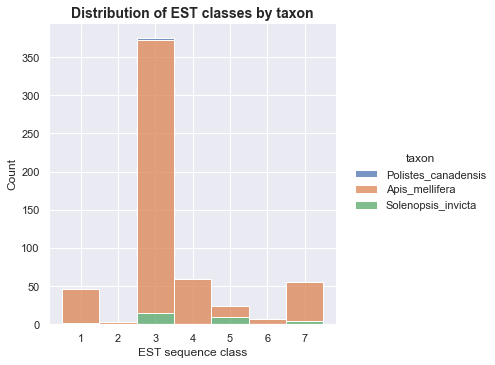

In [85]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True, hue='taxon', multiple='stack')
plt.title('Distribution of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

Text(0.5, 8.95999999999998, 'EST sequence class')

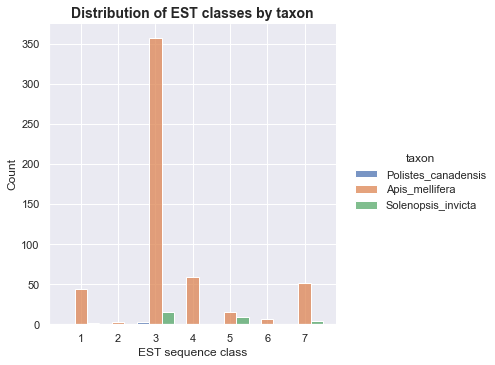

In [99]:
sns.displot(data=xgroups_data, x='seq_class', discrete=True, hue='taxon', multiple='dodge')
plt.title('Distribution of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')

#### Boxplots of EST classes

Text(0, 0.5, 'Seq length')

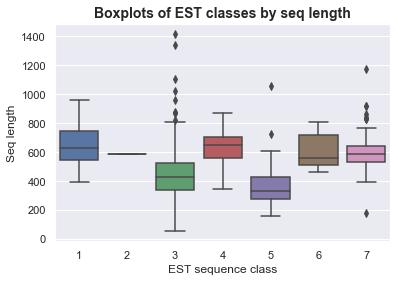

In [138]:
sns.boxplot(data=xgroups_data, x='seq_class', y='seq_len')
plt.title('Boxplots of EST classes by seq length', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')

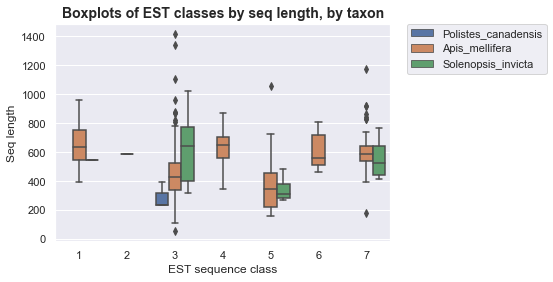

In [147]:
sns.boxplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon')
plt.title('Boxplots of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Stripplot of EST classes

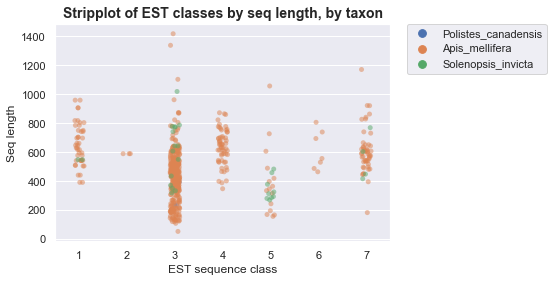

In [150]:
sns.stripplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon', alpha=.5)
plt.title('Stripplot of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Barplots of EST classes

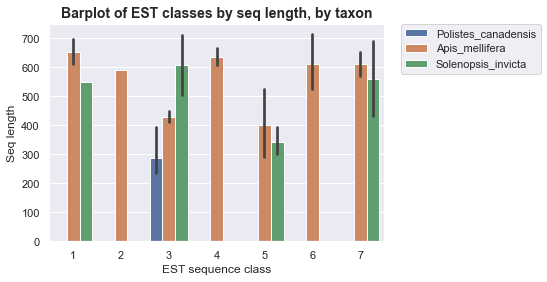

In [157]:
sns.barplot(data=xgroups_data, x='seq_class', y='seq_len', hue='taxon')
plt.title('Barplot of EST classes by seq length, by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Seq length')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

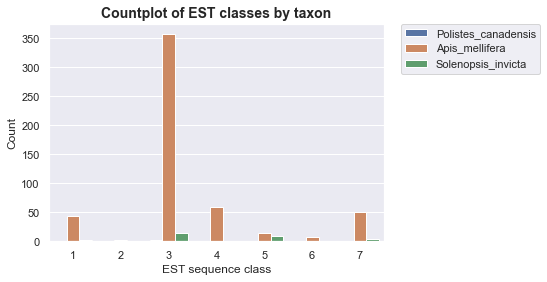

In [156]:
sns.countplot(data=xgroups_data, x='seq_class', hue='taxon')
plt.title('Countplot of EST classes by taxon', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('EST sequence class')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)